# Polish Energy Moguls - Comparative Analysis of Major Energy Companies

 **In the ever-evolving energy landscape of Poland, four regional powerhouses:**

*  Polska Grupa Energetyczna **(PGE)**
*  Tauron Polska Energia **(TPE)**
*  Energa SA **(ENG)**
*  ENEA SA **(ENA)**

Emerge as pivotal contributors not only to the nation's power sector but also to the regional dynamics of energy production. This comprehensive analysis aims to unravel the complexities of these correlated energy stocks, shedding light on their roles as key players in both national and regional energy production.


---


# **Reasons for selection:**



**1.  Treasury as a Major Shareholder:**

*   The Polish Treasury holding a significant stake in these energy giants, underscores the government's vested interest in the energy sector. This unique ownership structure introduces a layer of complexity to the companies' decision-making processes and strategic directions, as government policies and objectives may influence their operations.


**2.  Significance in the Energy Sector:**


*   PGE, Tauron, Enea, and Energa collectively represent a significant share (circa 70%) of the Polish energy market. Their operations span electricity generation, distribution, and trade, making them integral components of Poland's energy infrastructure.

**3.   Regional Impact:**



*   These corporations strategically partition Poland into four distinct spheres of influence, with Energa dominating the north, PGE in the east, Tauron in the south, and Enea in the west. From a customer-centric perspective, the geographical location of one's residence or business dictates the designated energy provider.


---























In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime
import requests
import seaborn as sns

---



# **Data Collection**


In the course of this analysis, data acquisition was accomplished through web scraping from Stooq.pl. Additionally, records required cleaning and correction of data types, a process detailed in the Python function presented below.



---


In [2]:
def get_stock_data(symbol):
  url = f'https://stooq.com/q/d/l/?s={symbol}&d1=19000101&d2=20301231&i=d'
  response = requests.get(url)
  lines = response.text.split('\n')
  header = lines[0].split(',')
  data = [line.split(',') for line in lines[1:] if line]
  df = pd.DataFrame(data, columns=header)
  df['Date'] = pd.to_datetime(df['Date'])
  for col in df.columns:
      if df[col].dtype == object:
          df[col] = pd.to_numeric(df[col].str.replace('\r', ''), errors='coerce')
  df.rename(columns = {'Volume\r' : 'Volume'}, inplace = True)
  return df

In [3]:
pge = get_stock_data('PGE')
tauron = get_stock_data('TPE')
energa = get_stock_data('ENG')
enea = get_stock_data('ENA')

In [4]:
pge_copy = pge.copy()
tauron_copy = tauron.copy()
energa_copy = energa.copy()
enea_copy = enea.copy()

In [5]:
companies = [pge, tauron, energa, enea]
names = ['Pge', 'Tauron', 'Energa', 'Enea']
symbols = ['PGE', 'TPE', 'ENG', 'ENA']

 The historical record lengths exhibited notable variability, as illustrated in [Graph 1.1](https://colab.research.google.com/drive/1g_7WkvK5jJtEIeRfs7HNX-j7yrvymJZD?authuser=2#scrollTo=6qXUGBnTLpW9&line=5&uniqifier=1). Consequently, adjustments were made to align with the dataset of the youngest stock within the group (11-12-2013).

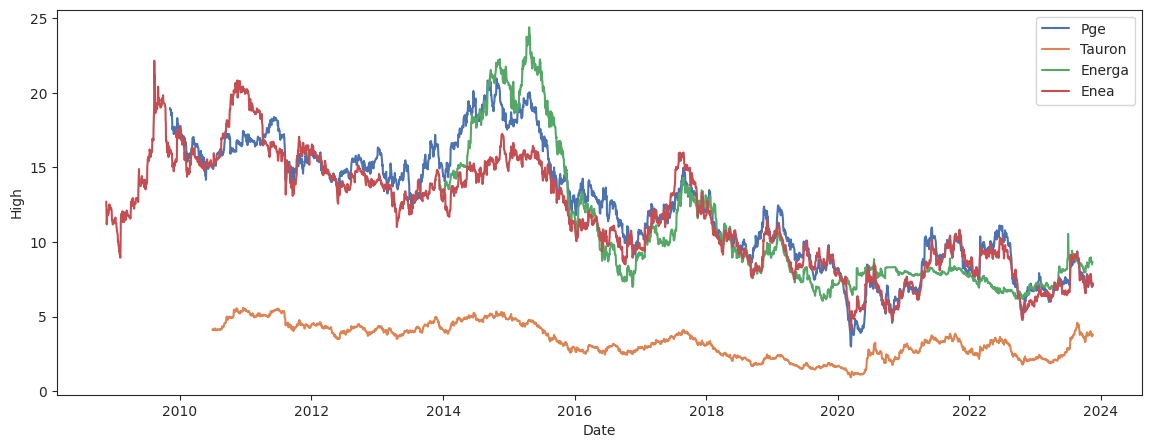

In [6]:
plt.figure(figsize=(14,5))
sns.set_style("ticks")
sns.set_palette('deep')
for cpn, name in zip(companies, names):
    sns.lineplot(data=cpn,x="Date",y="High",label=name)

In [7]:
max_date = None
for company in companies:
  start_date = company['Date'].min()
  if max_date == None or start_date >= max_date:
    max_date = start_date


In [8]:
max_date

Timestamp('2013-12-11 00:00:00')

In [9]:
pge = pge[pge['Date'] >= max_date]
pge.reset_index(drop=True, inplace=True)
tauron = tauron[tauron['Date'] >= max_date]
tauron.reset_index(drop=True, inplace=True)
energa = energa[energa['Date'] >= max_date]
energa.reset_index(drop=True, inplace=True)
enea = enea[enea['Date'] >= max_date]
enea.reset_index(drop=True, inplace=True)

In [10]:
pge.head()

,Date,Open,High,Low,Close,Volume
0,2013-12-11,15.133,15.264,14.764,14.782,2910527
1,2013-12-12,14.782,14.930,14.640,14.887,2424123
2,2013-12-13,15.028,15.028,14.640,14.877,2254826
3,2013-12-16,14.842,15.204,14.675,15.204,2825736
4,2013-12-17,15.204,15.204,14.729,14.729,2385555


---
# **Market Capitalization**

Over the past decade, market capitalization has demonstrated periodic surges for each company, with Energa experiencing significant peaks from late 2013 to mid-2015. Additionally, Tauron exhibited a noteworthy spike in early to mid-2018. In the subsequent five years, the data illustrates a heightened level of correlation, suggesting a more synchronized behavior among all companies, where their market capitalizations begin to move in a similar fashion.


---





In [11]:
pge['Cap'] = pge['Close'] * pge['Volume']
tauron['Cap'] = tauron['Close'] * tauron['Volume']
energa['Cap'] = energa['Close'] * energa['Volume']
enea['Cap'] = enea['Close'] * enea['Volume']

<ipython-input-11-2283e400605c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pge['Cap'] = pge['Close'] * pge['Volume']
<ipython-input-11-2283e400605c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tauron['Cap'] = tauron['Close'] * tauron['Volume']
<ipython-input-11-2283e400605c>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-do

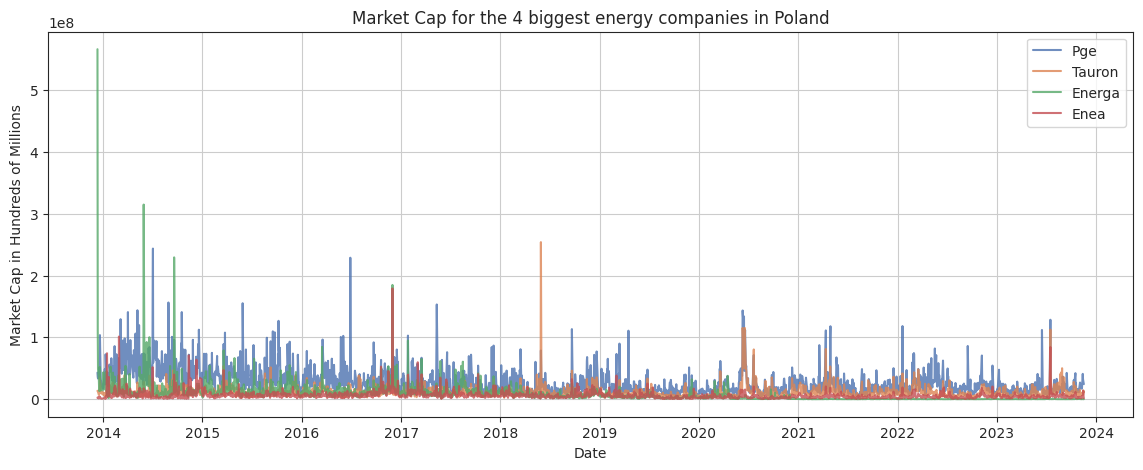

In [12]:
plt.figure(figsize=(14,5))

plt.plot(pge['Date'], pge['Cap'], label = pge, alpha = 0.8)
plt.plot(tauron['Date'], tauron['Cap'], label = tauron, alpha = 0.8)
plt.plot(energa['Date'], energa['Cap'], label = energa, alpha = 0.8)
plt.plot(enea['Date'], enea['Cap'], label = enea, alpha = 0.8)

plt.title('Market Cap for the 4 biggest energy companies in Poland')
plt.xlabel('Date')
plt.ylabel('Market Cap in Hundreds of Millions')
plt.legend(names)
plt.grid()
plt.show()

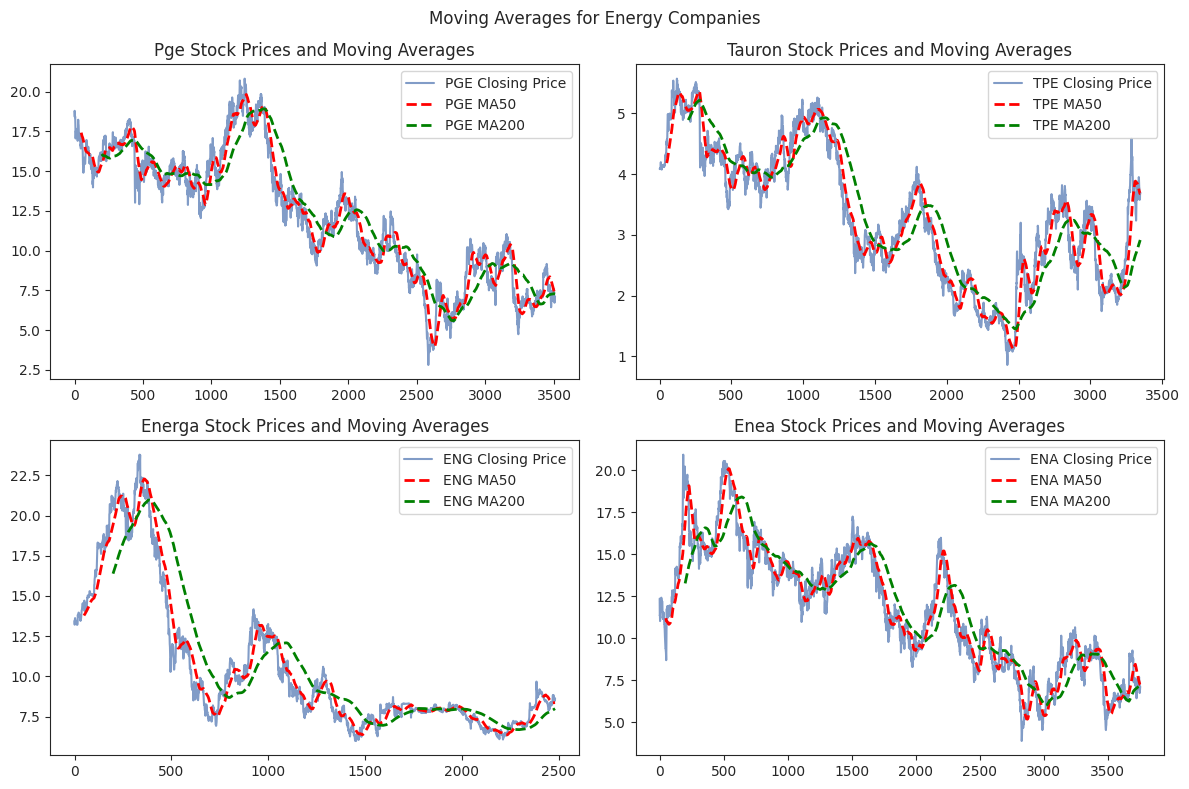

In [18]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))
fig.suptitle('Moving Averages for Energy Companies')

for i, ax in enumerate(axes.flatten()):
    company = companies[i]
    name = names[i]
    symbol = symbols[i]

    ma50 = company['Close'].rolling(50).mean()
    ma200 = company['Close'].rolling(200).mean()

    ax.plot(company['Close'], label=f'{symbol} Closing Price', alpha=0.7)

    ax.plot(ma50, label=f'{symbol} MA50', color='red', linestyle = '--', linewidth = 2)
    ax.plot(ma200, label=f'{symbol} MA200', color='green', linestyle = '--', linewidth = 2)

    ax.set_title(f'{name} Stock Prices and Moving Averages')
    ax.legend()

plt.tight_layout()
plt.show()



---

# **High Correaltion**

The analysis of Polska Grupa Energetyczna, Tauron Polska Energia, Enea SA, and Energa SA reveals a strikingly robust interplay, characterized by Pearson correlation coefficients exceeding 0.75. This exceptionally high level of correlation underscores a strong relationship between the stock movements of these energy giants.

---



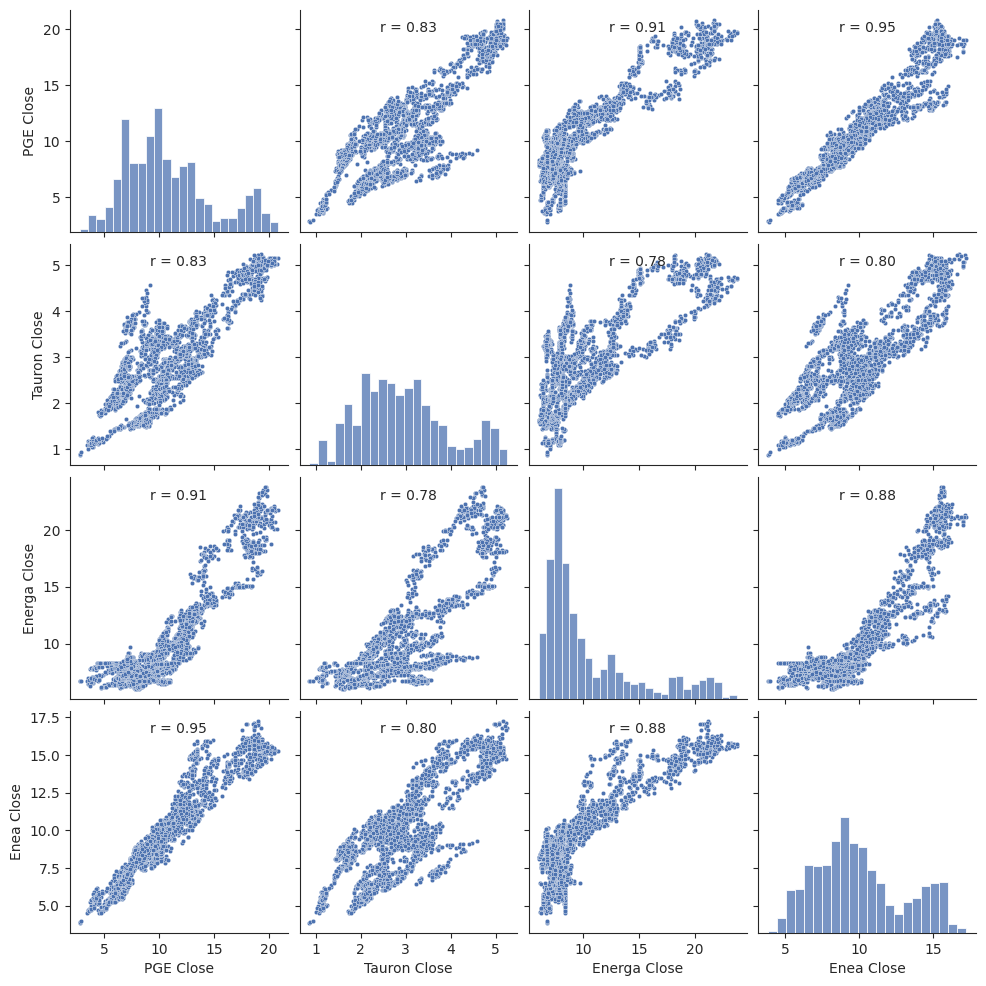

In [14]:
scatter_data = pd.concat([pge['Close'], tauron['Close'], energa['Close'], enea['Close']], axis = 1)
scatter_data.columns = ['PGE Close', 'Tauron Close', 'Energa Close', 'Enea Close']

correlation_matrix = scatter_data.corr()

scatter_matrix = sns.pairplot(scatter_data, kind='scatter', diag_kind='hist', plot_kws={'s': 10})

for i, (ax, coef) in enumerate(zip(scatter_matrix.axes.flat, correlation_matrix.values.flatten())):
    if i % (len(scatter_data.columns) + 1) != 0:
        ax.annotate(f"r = {coef:.2f}", xy=(0.5, 0.9), xycoords='axes fraction', ha='center')

plt.show()


In [ ]:
pge['Return'] = (pge['Close'] / pge['Close'].shift(1)) -1
tauron['Return'] = (tauron['Close'] / tauron['Close'].shift(1)) -1
energa['Return'] = (energa['Close'] / energa['Close'].shift(1)) -1
enea['Return'] = (enea['Close'] / enea['Close'].shift(1)) -1

In [16]:
pge.columns


Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Cap', 'Return'], dtype='object')